# Setup

In [443]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import string

import nltk
import os

import nltk.corpus 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

# display setup
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

%matplotlib inline

# The dataset: Airbnb dataset about Oslo
- reviews.csv: Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing)
- calendar.csv: Detailed Calendar data for listings in Oslo
- listings.csv: Detailed Listings data for Oslo

source: http://insideairbnb.com/get-the-data.html, datasets are scraped 28 September 2019
please download the datasets locally first

In [444]:
# get the data
listing = pd.read_csv('listings.csv')
review = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

C:\Users\Jinha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Question 1: Has there been growth in rentals in Oslo listing market? 
- Inferring growth in rental market using **review dataset.**

In [445]:
# first look on dataset
review.head()

,listing_id,date
0,42932,2013-09-02
1,42932,2014-08-11
2,42932,2014-12-31
3,42932,2015-04-20
4,42932,2015-06-13


In [446]:
# let's extract date variables from date column
def extract_date(df, column):
    df[column] =  pd.to_datetime(df[column])
    df[column+'_year'] = df[column].apply(lambda x: x.year)
    df[column+'_month'] = df[column].apply(lambda x: x.month)
    df[column+'_day'] = df[column].apply(lambda x: x.day)
    df[column+'_dayofweek'] = df[column].apply(lambda x: x.strftime('%A'))

In [447]:
extract_date(review, 'date')

In [448]:
review.groupby(['date_year'])['listing_id'].count()

date_year
2010        1
2011      117
2012      278
2013      958
2014     2950
2015     7928
2016    18500
2017    31648
2018    44411
2019    43269
Name: listing_id, dtype: int64

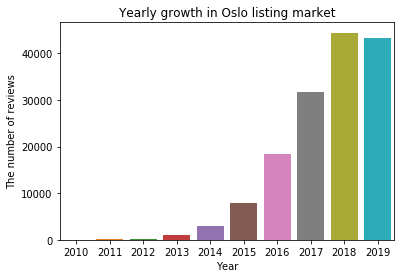

In [449]:
# visualize the yearly growth in Oslo listing market
ax = sns.countplot(review.date_year);
ax.set_title('Yearly growth in Oslo listing market');
ax.set_xlabel('Year');
ax.set_ylabel('The number of reviews');

### Answer 1
- From 2016, the listing market in Oslo really took off. 
- Even though 2019 has not ended yet, it seems like the market has stablized in 2019.

### Question 2: When should people visit Oslo? When is the most popular month of year, and how is the availability and price?
- Using both **review** and **calendar** dataset

In [450]:
review.groupby(['date_month'])['listing_id'].count()

date_month
1      6920
2      6951
3      9453
4      9395
5     14296
6     19014
7     19096
8     25345
9     16561
10     8820
11     7275
12     6934
Name: listing_id, dtype: int64

In [451]:
review.head()

,listing_id,date,date_year,date_month,date_day,date_dayofweek
0,42932,2013-09-02,2013,9,2,Monday
1,42932,2014-08-11,2014,8,11,Monday
2,42932,2014-12-31,2014,12,31,Wednesday
3,42932,2015-04-20,2015,4,20,Monday
4,42932,2015-06-13,2015,6,13,Saturday


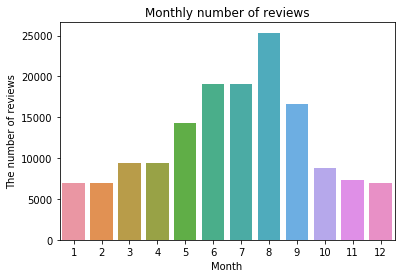

In [452]:
# visualize the yearly growth in Oslo listing market
ax = sns.countplot(review.date_month);
ax.set_title('Monthly number of reviews');
ax.set_xlabel('Month');
ax.set_ylabel('The number of reviews');

#### Summer, expecially August, seems to be the most popular months to visit Oslo, but how is the availability during that time?

In [453]:
# we will use the calendar dataset to check the availability
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6253332,2019-09-28,f,$800.00,$800.00,2,1125
1,6253332,2019-09-29,f,$800.00,$800.00,2,1125
2,6253332,2019-09-30,f,$800.00,$800.00,2,1125
3,6253332,2019-10-01,f,$800.00,$800.00,2,1125
4,6253332,2019-10-02,f,$800.00,$800.00,2,1125


In [454]:
# following code will generate date variables (year, month, day, day of week) from 'date' variable
extract_date(calendar, 'date')
# generate dummy variables based on availability from calendar dataset
calendar = pd.get_dummies(calendar, columns = ['available'])

In [455]:
# availabie_t equals to 1 if the place is available
calendar.groupby(['date_month'])['available_t'].describe()

,count,mean,std,min,25%,50%,75%,max
date_month,,,,,,,,
1,265887.0,0.185831,0.388971,0.0,0.0,0.0,0.0,1.0
2,248733.0,0.196114,0.397057,0.0,0.0,0.0,0.0,1.0
3,265887.0,0.189016,0.391522,0.0,0.0,0.0,0.0,1.0
4,257310.0,0.141740,0.348783,0.0,0.0,0.0,0.0,1.0
5,265887.0,0.142410,0.349471,0.0,0.0,0.0,0.0,1.0
6,257310.0,0.142404,0.349465,0.0,0.0,0.0,0.0,1.0
7,265887.0,0.139676,0.346651,0.0,0.0,0.0,0.0,1.0
8,265887.0,0.137273,0.344136,0.0,0.0,0.0,0.0,1.0
9,248733.0,0.134059,0.340717,0.0,0.0,0.0,0.0,1.0


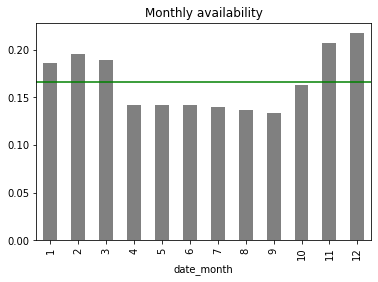

In [456]:
# visualize the monthly availability of Oslo listing market
plot = calendar.groupby(['date_month'])['available_t'].mean().plot(kind='bar', title = 'Monthly availability', color = 'grey').axhline(calendar.available_t.mean(), color = 'green');

#### How is the price during the popular months?

In [457]:
calendar.head()

,listing_id,date,price,adjusted_price,minimum_nights,maximum_nights,date_year,date_month,date_day,date_dayofweek,available_f,available_t
0,6253332,2019-09-28,$800.00,$800.00,2,1125,2019,9,28,Saturday,1,0
1,6253332,2019-09-29,$800.00,$800.00,2,1125,2019,9,29,Sunday,1,0
2,6253332,2019-09-30,$800.00,$800.00,2,1125,2019,9,30,Monday,1,0
3,6253332,2019-10-01,$800.00,$800.00,2,1125,2019,10,1,Tuesday,1,0
4,6253332,2019-10-02,$800.00,$800.00,2,1125,2019,10,2,Wednesday,1,0


In [458]:
# we can see the both price and adjusted_price are string objects
calendar.price.dtypes

dtype('O')

In [459]:
# fixing string price variable to float variable to calculate the average
def fixPrice(df, column):
    df[column] = df[column].str.replace('$', '')
    df[column] = df[column].str.replace(',', '')
    df[column] = df[column].astype(float)

In [460]:
fixPrice(calendar, 'price')
fixPrice(calendar, 'adjusted_price') 

In [461]:
#check if it looks ok
calendar.head()

,listing_id,date,price,adjusted_price,minimum_nights,maximum_nights,date_year,date_month,date_day,date_dayofweek,available_f,available_t
0,6253332,2019-09-28,800.0,800.0,2,1125,2019,9,28,Saturday,1,0
1,6253332,2019-09-29,800.0,800.0,2,1125,2019,9,29,Sunday,1,0
2,6253332,2019-09-30,800.0,800.0,2,1125,2019,9,30,Monday,1,0
3,6253332,2019-10-01,800.0,800.0,2,1125,2019,10,1,Tuesday,1,0
4,6253332,2019-10-02,800.0,800.0,2,1125,2019,10,2,Wednesday,1,0


In [462]:
calendar.groupby(['date_month'])['price', 'adjusted_price'].mean() # not so much difference between price and adjusted_price

,price,adjusted_price
date_month,,
1,918.065001,917.742921
2,933.618185,933.235329
3,938.377800,938.013867
4,941.065749,940.697175
5,942.904407,942.529714
6,943.209642,942.836714
7,944.164814,943.791009
8,944.519841,944.142576
9,941.742921,941.338021


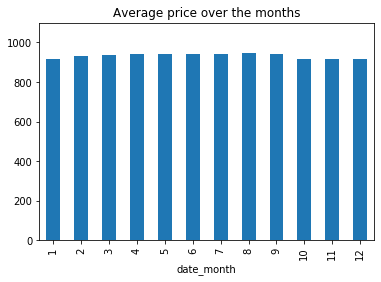

In [463]:
plt.ylim(0, 1100)
calendar.groupby(['date_month'])['price'].mean().plot(kind='bar', title = 'Average price over the months');

### Answer 2
- During the popular months (May - September), the average availability is lower than other months as well. Would recommend people to book in advance if they are planning to visit during summer.
- The average price is the highest during popular months. But the difference is not huge (about 30 USD difference per night) compared to the least popular month

### Question 3: Where should people stay in Oslo? Can I say something about location, price, availability, and atmosphere of different neighborhood?
- using *listing* data set

In [464]:
# let's use the listing dataset
# take the first look of the data
listing.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.577000e+03,8577,8.577000e+03,8577,8556,8296,5158,8407,8577,4892,2472,5417,4155,4293,5104,0.0,0.0,8577,0.0,8.577000e+03,8577,8576,8576,8544,4231,4321,4321,0.0,8576,8576,8576,5974,8576.000000,8576.000000,8577,8576,8576,8577,8303,8577,0.0,8543,8494,8254,8547,8577,8577,8577,8577.000000,8577.000000,8577,8577,8577,8577.000000,8575.000000,8572.000000,8569.000000,8577,8577,51.000000,8577,880,569,4449,5926,8577.000000,8577,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577,8577,8577.000000,8577.000000,8577.000000,8577.000000,8577,8577.000000,8577.000000,6842,6842,6673.000000,6669.000000,6672.000000,6659.000000,6667.000000,6657.000000,6656.000000,8577,0.0,0.0,8577,8577,8577,8577,8577,8577.000000,8577.000000,8577.000000,8577.000000,6842.000000
unique,NaN,8577,NaN,1,8300,8125,4968,8302,1,4597,2331,5107,3809,3992,4638,NaN,NaN,8457,NaN,NaN,7500,2872,2451,280,3501,4,44,NaN,2,7487,7487,26,NaN,NaN,199,2,2,78,14,17,NaN,61,15,579,4,64,1,1,NaN,NaN,2,24,4,NaN,NaN,NaN,NaN,5,8355,NaN,292,299,217,190,284,NaN,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,1,NaN,NaN,NaN,NaN,1,NaN,NaN,1729,1173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,1,4,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/22875302,NaN,2019-09-28,Urban Apartments Grünerløkka Spacious Studio,Modern room with double bed close to Majorstue...,Urban Apartments ligger i byens hippeste bydel...,In our beautiful fully equipped studio apartme...,none,The villa is located in a quiet villa neighbor...,"This is my personal and private home, so pleas...",Ruter is the name of the public transport prov...,The whole apartment,Contact us through Airbnb,- No shoes inside,NaN,NaN,https://a0.muscache.com/im/pictures/effa7ae3-f...,NaN,NaN,https://www.airbnb.com/users/show/233933220,Martin,2016-02-15,"Oslo, Oslo, Norway",Urban Apartments er et selskap som tilbyr kort...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/f244d...,https://a0.muscache.com/im/pictures/user/f244d...,Grünerløkka,NaN,NaN,"['email', 'phone']",t,f,"Oslo, Oslo, Norway",Grünerløkka,Grünerløkka,NaN,Oslo,Oslo,0190,Oslo,"Oslo, Norway",NO,Norway,NaN,NaN,t,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,{},NaN,$499.00,"$5,000.00","$15,000.00",$0.00,$500.00,NaN,

- Neighbourhood_cleansed seems to have less NaN values, so let's use this variable to compare different neighbourhoods in Oslo. 
- There are also some text variables that we can use to describe atmosphere (name, summary, space, descrption)

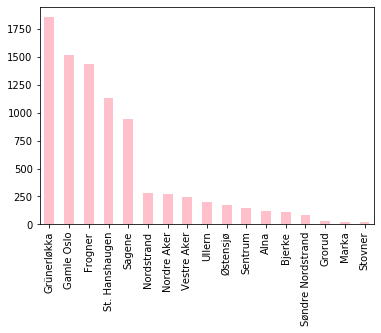

In [478]:
listing.neighbourhood_cleansed.value_counts().plot(kind='bar', color = 'pink');

- Grünerløkka, Gamle Oslo, Frogner, St. Hanshaugen, and Sagene are the top 5 neighborhood in terms of the number of listed places

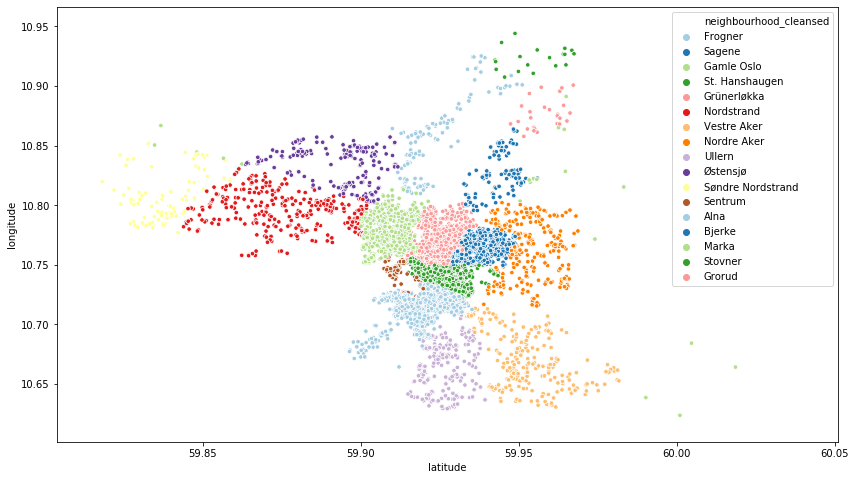

In [479]:
# how are each neighborhood located from each other?
plt.figure(figsize=(14,8))
with sns.color_palette("Paired", 20):
    sns.scatterplot(x=listing['latitude'], y=listing['longitude'], hue=listing["neighbourhood_cleansed"], s=20)

- We can see that Frogner, Sagene, Gamle Oslo, St. Hanshaugen, and Grünerløkka (the top 5 with most listings) are located close to Sentrum, which is a Norwegian word for city center

#### How are the prices of different neighbourhoods?

In [480]:
# fix price variable
fixPrice(listing, 'price')

In [481]:
# let's look at the number of the average prices per neighbourhood
listing.groupby(['neighbourhood_cleansed'])['price'].describe().sort_values(['count'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Grünerløkka,1856.0,823.793642,465.800533,209.0,554.00,726.0,963.00,5085.0
Gamle Oslo,1518.0,884.345191,721.832965,82.0,499.00,736.0,999.00,15001.0
Frogner,1440.0,1048.557639,1120.218939,91.0,599.00,799.0,1155.25,30002.0
St. Hanshaugen,1129.0,988.092117,2446.151651,136.0,572.00,799.0,1053.00,80000.0
Sagene,944.0,767.829449,834.319417,200.0,509.00,654.0,854.00,17371.0
Nordstrand,283.0,1394.484099,5396.181989,127.0,499.00,799.0,1299.00,90806.0
Nordre Aker,273.0,901.608059,734.813670,154.0,499.00,736.0,1099.00,10007.0
Vestre Aker,248.0,1040.112903,1001.785731,254.0,499.00,799.0,1232.75,11995.0
Ullern,198.0,1110.282828,1005.802980,154.0,547.25,854.0,1296.50,9998.0


- Grunerløkka, Gamle Oslo, Frogner, St. Hanshaugen, Sagene have the most listings and they are located closely to each other, and to the city center.
- Looking at both mean and median price, we can see that Frogner is the most expensive neighborhood among the five neighbourhood with most listings. 
- Nordstrand, Nordre Aker, Ullern, Marka seem to have quite high price as well

#### How is the availability of different neighbourhoods?

In [482]:
listing.groupby(['neighbourhood_cleansed'])['availability_365'].mean()

neighbourhood_cleansed
Alna                 55.443478
Bjerke               48.386792
Frogner              70.059722
Gamle Oslo           62.505270
Grorud               78.807692
Grünerløkka          50.976293
Marka                55.041667
Nordre Aker          54.637363
Nordstrand           78.526502
Sagene               41.320975
Sentrum              79.845070
St. Hanshaugen       57.452613
Stovner              38.250000
Søndre Nordstrand    70.352941
Ullern               95.353535
Vestre Aker          98.693548
Østensjø             50.547059
Name: availability_365, dtype: float64

In [483]:
listing.availability_365.mean()

60.19563950099102

- Among the top 5 neighborhoods in terms of the number of listed places, Grunerløkka and Sagene have the worst availability

#### According to Airbnb, entire homes or apartments highly available year-round for tourists, probably don't have the owner present, could be illegal, and more importantly, are displacing residents.

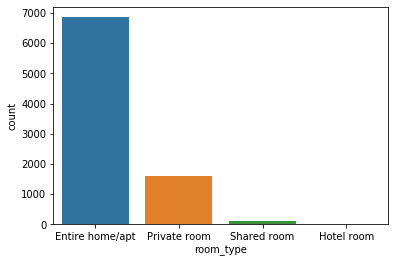

In [484]:
sns.countplot(listing.room_type)

- Most of the listed places are entire home/apartment

In [485]:
# defining high_availability 
# high_availabile: > 60 days per year
listing['high_availability'] = np.where(listing['availability_365'] > 60, 1, 0)

In [486]:
listing.groupby(['room_type']).high_availability.mean()

room_type
Entire home/apt    0.244308
Hotel room         0.882353
Private room       0.375310
Shared room        0.375000
Name: high_availability, dtype: float64

In [487]:
listing[listing.room_type == 'Entire home/apt'].groupby(['neighbourhood'])['high_availability'].describe().sort_values(['count'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Grünerløkka,1557.0,0.201670,0.401376,0.0,0.0,0.0,0.00,1.0
Gamle Oslo,1180.0,0.258475,0.437982,0.0,0.0,0.0,1.00,1.0
Sagene,873.0,0.177549,0.382351,0.0,0.0,0.0,0.00,1.0
St. Hanshaugen,764.0,0.225131,0.417942,0.0,0.0,0.0,0.00,1.0
Majorstuen,614.0,0.263844,0.441075,0.0,0.0,0.0,1.00,1.0
Frogner,405.0,0.293827,0.456077,0.0,0.0,0.0,1.00,1.0
Nordstrand,296.0,0.324324,0.468915,0.0,0.0,0.0,1.00,1.0
Ullern,202.0,0.311881,0.464413,0.0,0.0,0.0,1.00,1.0
Sentrum,184.0,0.385870,0.488128,0.0,0.0,0.0,1.00,1.0


In [488]:
listing[listing.room_type == 'Entire home/apt'].groupby(['neighbourhood_cleansed'])['high_availability'].mean()

neighbourhood_cleansed
Alna                 0.260870
Bjerke               0.273973
Frogner              0.289292
Gamle Oslo           0.263841
Grorud               0.444444
Grünerløkka          0.201320
Marka                0.227273
Nordre Aker          0.248908
Nordstrand           0.339056
Sagene               0.176471
Sentrum              0.361345
St. Hanshaugen       0.218610
Stovner              0.266667
Søndre Nordstrand    0.309091
Ullern               0.318471
Vestre Aker          0.356757
Østensjø             0.162602
Name: high_availability, dtype: float64

- Among the neighborhoods with most listings, Frogner and Gamle Oslo have the biggest share of entire place with high availability. It could be wise to read reviews about the host before booking places in these neighbourhoods.

#### Can we say something about the atmostphere of different neighborhood based on description of the place?

In [489]:
listing.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,high_availability
count,8.577000e+03,8577,8.577000e+03,8577,8556,8296,5158,8407,8577,4892,2472,5417,4155,4293,5104,0.0,0.0,8577,0.0,8.577000e+03,8577,8576,8576,8544,4231,4321,4321,0.0,8576,8576,8576,5974,8576.000000,8576.000000,8577,8576,8576,8577,8303,8577,0.0,8543,8494,8254,8547,8577,8577,8577,8577.000000,8577.000000,8577,8577,8577,8577.000000,8575.000000,8572.000000,8569.000000,8577,8577,51.000000,8577.000000,880,569,4449,5926,8577.000000,8577,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577.000000,8577,8577,8577.000000,8577.000000,8577.000000,8577.000000,8577,8577.000000,8577.000000,6842,6842,6673.000000,6669.000000,6672.000000,6659.000000,6667.000000,6657.000000,6656.000000,8577,0.0,0.0,8577,8577,8577,8577,8577,8577.000000,8577.000000,8577.000000,8577.000000,6842.000000,8577.000000
unique,NaN,8577,NaN,1,8300,8125,4968,8302,1,4597,2331,5107,3809,3992,4638,NaN,NaN,8457,NaN,NaN,7500,2872,2451,280,3501,4,44,NaN,2,7487,7487,26,NaN,NaN,199,2,2,78,14,17,NaN,61,15,579,4,64,1,1,NaN,NaN,2,24,4,NaN,NaN,NaN,NaN,5,8355,NaN,NaN,299,217,190,284,NaN,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,1,NaN,NaN,NaN,NaN,1,NaN,NaN,1729,1173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,1,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/22875302,NaN,2019-09-28,Urban Apartments Grünerløkka Spacious Studio,Modern room with double bed close to Majorstue...,Urban Apartments ligger i byens hippeste bydel...,In our beautiful fully equipped studio apartme...,none,The villa is located in a quiet villa neighbor...,"This is my personal and private home, so pleas...",Ruter is the name of the public transport prov...,The whole apartment,Contact us through Airbnb,- No shoes inside,NaN,NaN,https://a0.muscache.com/im/pictures/effa7ae3-f...,NaN,NaN,https://www.airbnb.com/users/show/233933220,Martin,2016-02-15,"Oslo, Oslo, Norway",Urban Apartments er et selskap som tilbyr kort...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/f244d...,https://a0.muscache.com/im/pictures/user/f244d...,Grünerløkka,NaN,NaN,"['email', 'phone']",t,f,"Oslo, Oslo, Norway",Grünerløkka,Grünerløkka,NaN,Oslo,Oslo,0190,Oslo,"Oslo, Norway",NO,Norway,NaN,NaN,t,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,"$5,00

- name, summary, space, description, and neighborhood_overview have text information we can be interested in.

In [490]:
## let's make a new variable that contain all the information from above variables
listing['text'] = listing['name'].fillna('').str.cat(others = [listing.summary.fillna(''), listing.space.fillna(''), listing.description.fillna('')], sep = ' ')

In [491]:
np.sum(listing.text.isnull()) ## wohoo! no null row

0

In [492]:
listing.text.head()

0    Charming apartment, Oslo Center, Ro  Charming ...
1    Lovely low budgetroom in nice area! This is a ...
2    Room for recreation up town Oslo Neat and fres...
3    Lovely flat in Oslo city centre  Warm, modern ...
4    Central big room - ap with balcony  A bargain ...
Name: text, dtype: object

#### Preprosessing of text variable
- remove punctuation
- regex tokenization
- getting rid of stopwords for Norwegian, English, and some more words

In [493]:
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [494]:
listing['text_tokenize'] = listing['text'].apply(lambda x: remove_punctuation(x))

In [495]:
listing.text_tokenize.head()

0    Charming apartment Oslo Center Ro  Charming ap...
1    Lovely low budgetroom in nice area This is a s...
2    Room for recreation up town Oslo Neat and fres...
3    Lovely flat in Oslo city centre  Warm modern f...
4    Central big room  ap with balcony  A bargain i...
Name: text_tokenize, dtype: object

In [496]:
tokenizer = RegexpTokenizer(r'\w+')

In [497]:
listing['text_tokenize'] = listing['text_tokenize'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [498]:
listing.text_tokenize.head()

0    [charming, apartment, oslo, center, ro, charmi...
1    [lovely, low, budgetroom, in, nice, area, this...
2    [room, for, recreation, up, town, oslo, neat, ...
3    [lovely, flat, in, oslo, city, centre, warm, m...
4    [central, big, room, ap, with, balcony, a, bar...
Name: text_tokenize, dtype: object

In [499]:
## removing some words that are very general adjectives/word that are used to describe places
to_remove = ['walking distance', 'apartment', 'min walk', 'leilighet', 'url', 'hidden', 'oslo', 'appartment', 'apt', 'room', 'place', 'house', 'bedroom',
            'location', 'located', 'flat', 'welcome', 'private room', 'home', 'studio', 'close', 'two', 'sqm', 'loft', 'nice', 'one', 'm2', 'kvm']

In [500]:
mystopwords = stopwords.words('english') + stopwords.words('norwegian') + to_remove

In [501]:
def remove_stopwords(text):
    words = [w for w in text if w not in mystopwords]
    return words

In [502]:
listing['text_tokenize'] = listing['text_tokenize'].apply(lambda x: remove_stopwords(x))

In [503]:
text = listing.text_tokenize.to_string()

#### Visualization using Wordcloud

#### Grünerløkka

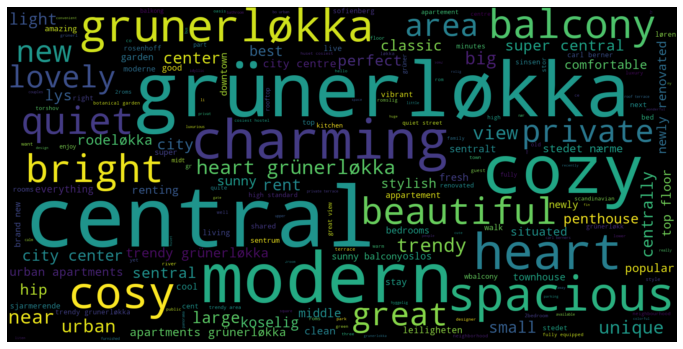

In [504]:
listing_grunerlokka = listing[listing.neighbourhood_cleansed == 'Grünerløkka']
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, normalize_plurals=False).generate(listing_grunerlokka['text_tokenize'].to_string())
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

#### Gamle Oslo

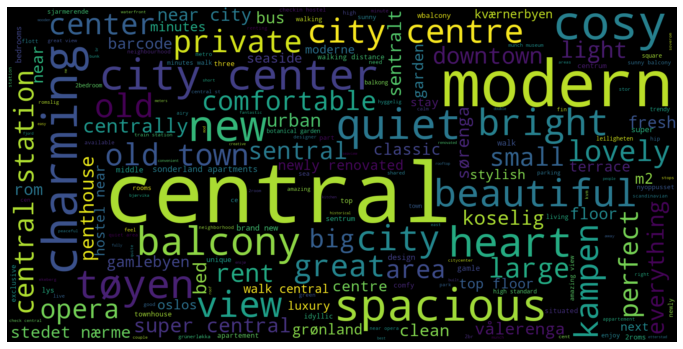

In [435]:
listing_gamleoslo = listing[listing.neighbourhood_cleansed == 'Gamle Oslo']
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, normalize_plurals=False).generate(listing_gamleoslo['text_tokenize'].to_string())
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

#### Frogner

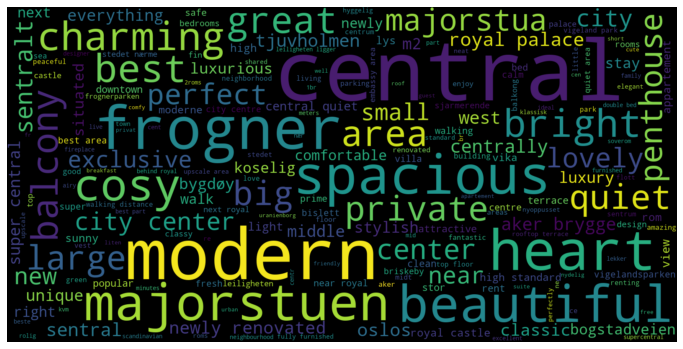

In [436]:
listing_frogner = listing[listing.neighbourhood_cleansed == 'Frogner']
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, normalize_plurals=False).generate(listing_frogner['text_tokenize'].to_string())
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

#### St. Hanshaugen 

In [396]:
listing_sthanshaugen = listing[listing.neighbourhood_cleansed == 'St. Hanshaugen']

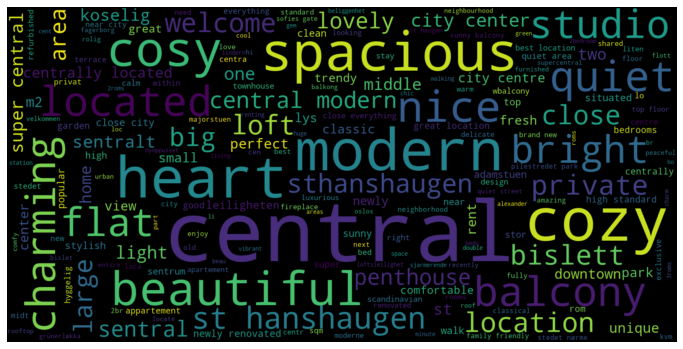

In [437]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, normalize_plurals=False).generate(listing_sthanshaugen['text_tokenize'].to_string())
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

#### Sagene

In [246]:
listing_sagene = listing[listing.neighbourhood_cleansed == 'Sagene']

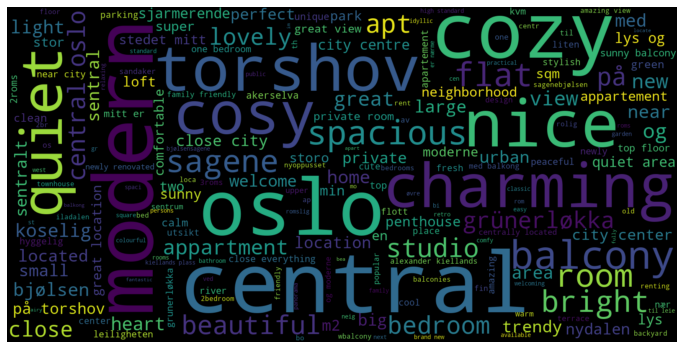

In [438]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, normalize_plurals=False).generate(listing_sagene['text_tokenize'].to_string())
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

References and Inspirations from
- https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f
- https://www.kaggle.com/aashirwad01/airbnb-analysis
- https://sanjayasubedi.com.np/nlp/nlp-feature-extraction/
- https://www.kaggle.com/divsinha/sentiment-analysis-countvectorizer-tf-idf